<a href="https://colab.research.google.com/github/iamabd53/Bike-Sharing-Demand-Prediction/blob/main/Bike_sharing_with_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#!pip3 install pandas_profiling --upgrade

In [4]:
df = pd.read_csv('/content/drive/MyDrive/EDA material/SeoulBikeData.csv', encoding ="ISO-8859-1")

In [5]:
# from pandas_profiling import ProfileReport
# prof = ProfileReport(df)
# prof.to_file(output_file = 'output.html')

In [6]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [8]:
df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

In [9]:
df['Hour']

0        0
1        1
2        2
3        3
4        4
        ..
8755    19
8756    20
8757    21
8758    22
8759    23
Name: Hour, Length: 8760, dtype: int64

**Data cleaning**

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
# creating a month column
df['Month'] = df['Date'].apply(lambda x : x.month)

In [12]:
# creating a year column
df['Year'] = df['Date'].apply(lambda x : x.year)

In [13]:
df['WeekDay']= df['Date'].dt.day_name()

In [14]:
df.head(3)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-01-12                254     0             -5.2           37   
1 2017-01-12                204     1             -5.5           38   
2 2017-01-12                173     2             -6.0           39   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  Month  Year   WeekDay  
0             Yes      1  2017  Thursday  
1             Yes      1  2017  Thursday  
2             Yes      1  2017  Thursday

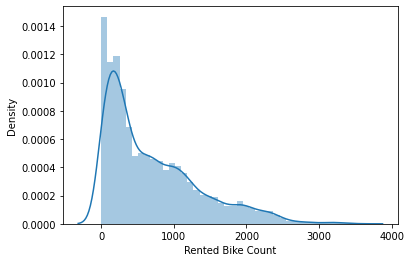

In [15]:
sns.distplot(df['Rented Bike Count'])

## **EDA**

In [16]:
df.shape

(8760, 17)

In [17]:
# we create point plots with Rented Bike Count during different categorical features with respect of Hour
# for i in df.columns:
#   if i == 'Hour':
#     pass
#   else:
#     plt.figure(figsize=(20,10))
#     sns.pointplot(x=df["Hour"],y=df['Rented Bike Count'],hue=df[i])
#     plt.title(f"Rented Bike Count during different {i} with respect of Hour")
#   plt.show()

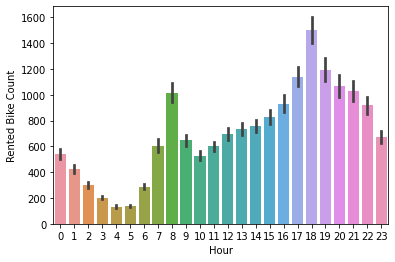

In [18]:
sns.barplot(x=df['Hour'],y=df['Rented Bike Count'])
plt.xticks(rotation = 'horizontal')
plt.show()

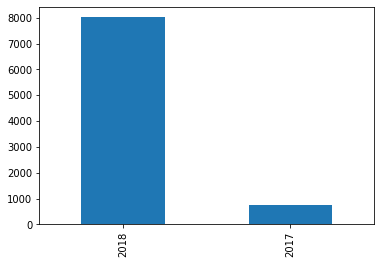

In [19]:
df['Year'].value_counts().plot(kind = 'bar')

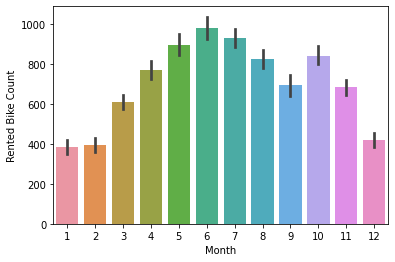

In [20]:
sns.barplot(x=df['Month'],y=df['Rented Bike Count'])
plt.xticks(rotation = 'horizontal')
plt.show()


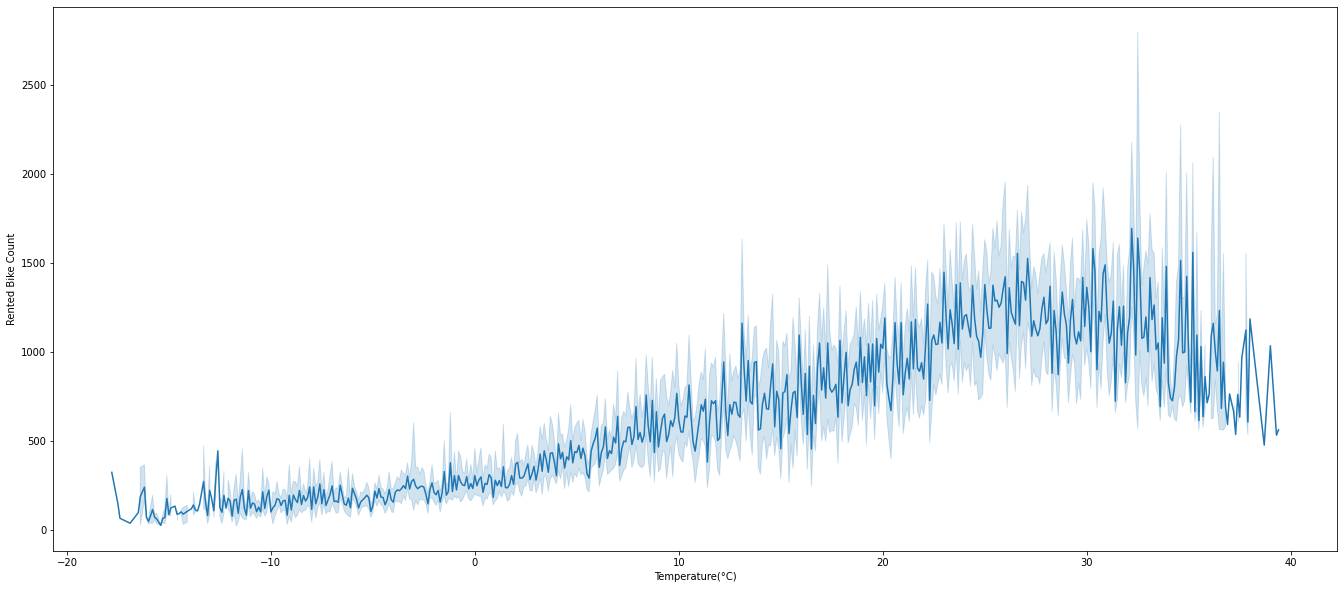

In [21]:
plt.figure(figsize=(23,10))
sns.lineplot(x=df['Temperature(°C)'],y=df['Rented Bike Count'])
plt.xticks(rotation = 'horizontal')
plt.show()

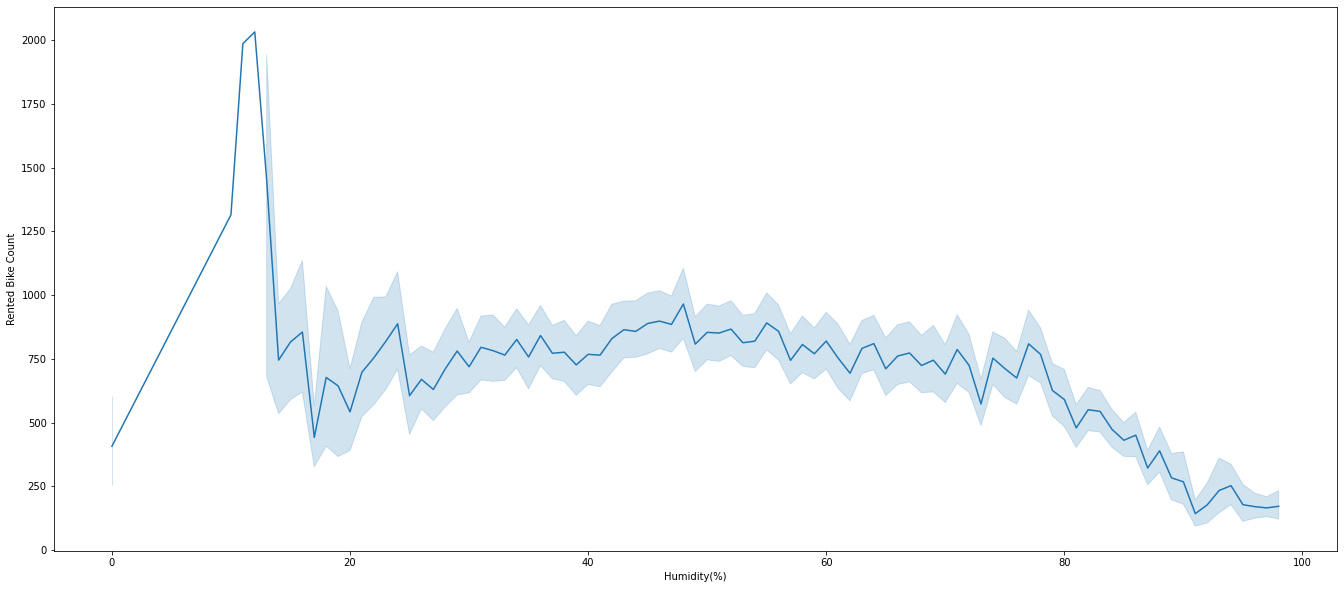

In [22]:
plt.figure(figsize=(23,10))
sns.lineplot(x=df['Humidity(%)'],y=df['Rented Bike Count'])
plt.xticks(rotation = 'horizontal')
plt.show()

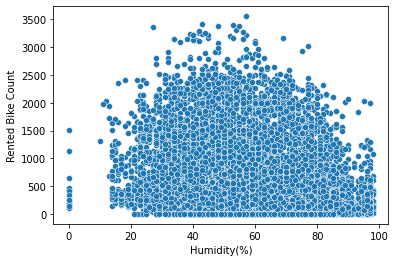

In [23]:
sns.scatterplot(x = df['Humidity(%)'],y = df['Rented Bike Count'] )

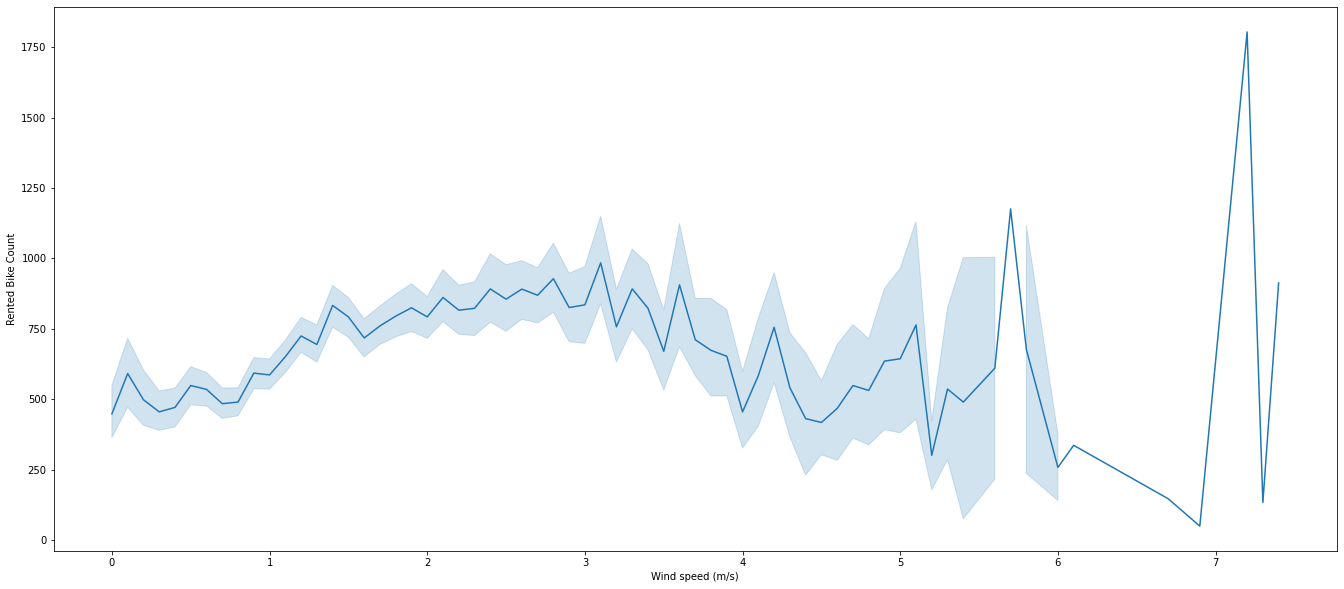

In [24]:
plt.figure(figsize=(23,10))
sns.lineplot(x=df['Wind speed (m/s)'],y=df['Rented Bike Count'])
plt.xticks(rotation = 'horizontal')
plt.show()

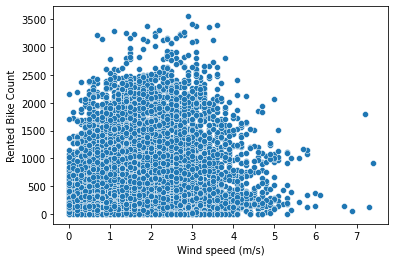

In [25]:
sns.scatterplot(x = df['Wind speed (m/s)'],y = df['Rented Bike Count'] )

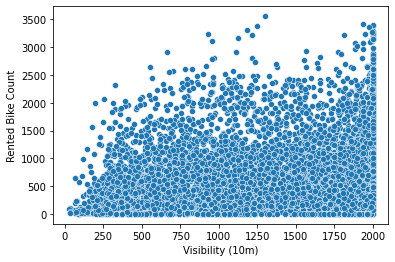

In [26]:
sns.scatterplot(x = df['Visibility (10m)'],y = df['Rented Bike Count'] )

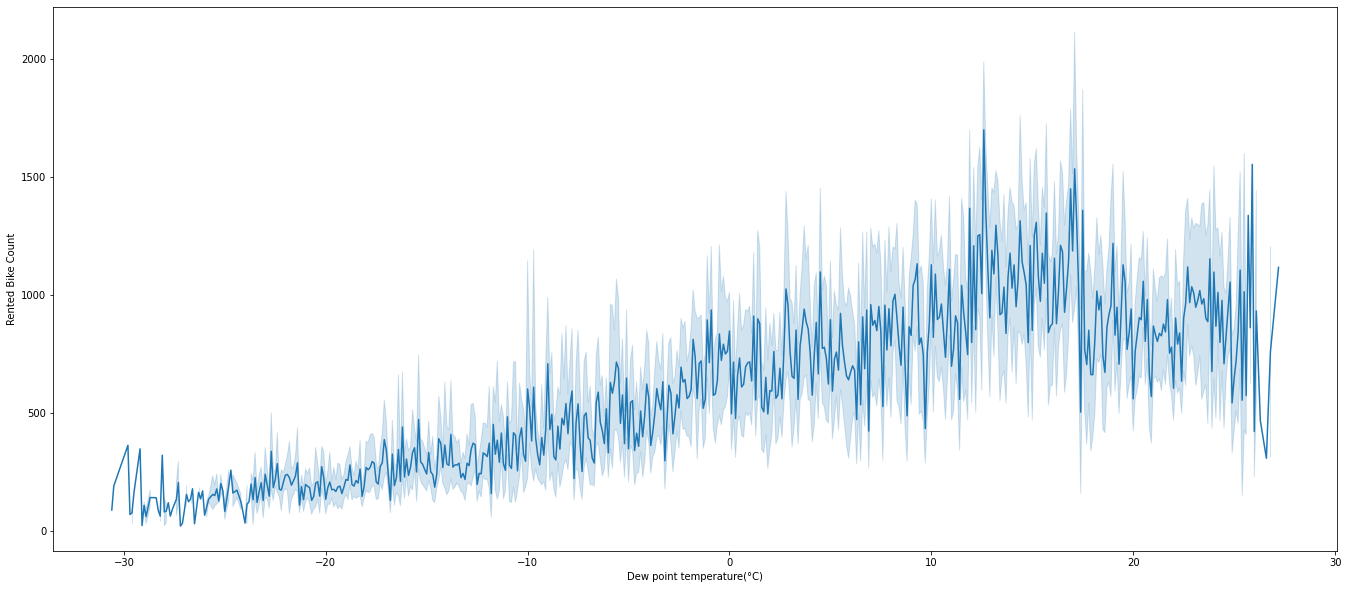

In [27]:
plt.figure(figsize=(23,10))
sns.lineplot(x=df['Dew point temperature(°C)'],y=df['Rented Bike Count'])
plt.xticks(rotation = 'horizontal')
plt.show()

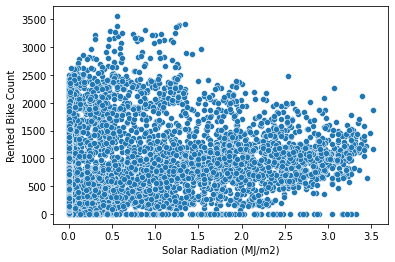

In [28]:
sns.scatterplot(x = df['Solar Radiation (MJ/m2)'],y = df['Rented Bike Count'] )

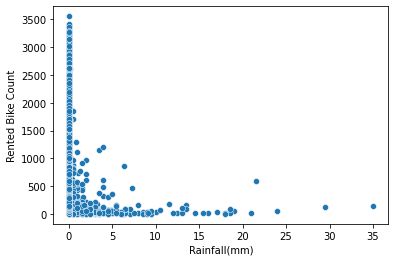

In [29]:
sns.scatterplot(x = df['Rainfall(mm)'],y = df['Rented Bike Count'] )

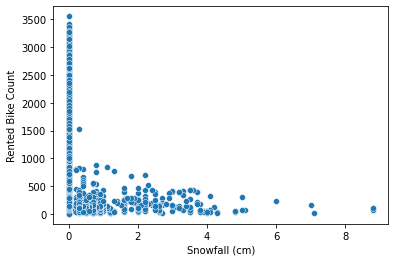

In [30]:
sns.scatterplot(x = df['Snowfall (cm)'],y = df['Rented Bike Count'] )

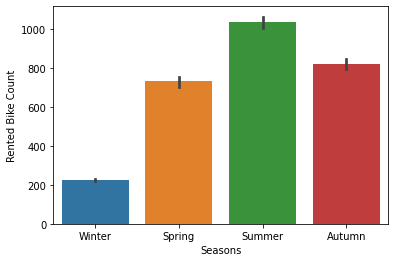

In [31]:
sns.barplot(x=df['Seasons'],y=df['Rented Bike Count'])
plt.xticks(rotation = 'horizontal')
plt.show()


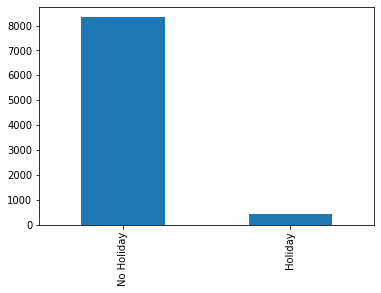

In [32]:
df['Holiday'].value_counts().plot(kind = 'bar')

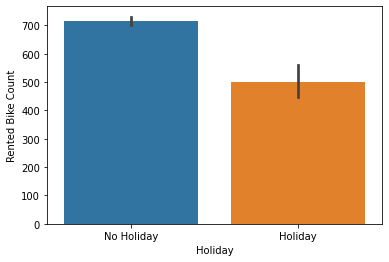

In [33]:
sns.barplot(x=df['Holiday'], y=df['Rented Bike Count'])
plt.show()

In [34]:
df[df['Holiday'] == 'Holiday'].shape

(432, 17)

In [35]:
df[df['Holiday'] == 'No Holiday'].shape

(8328, 17)

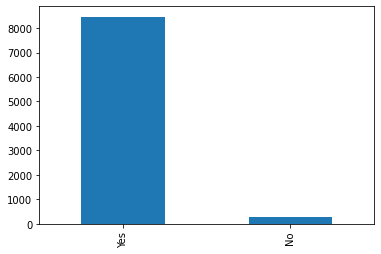

In [36]:
df['Functioning Day'].value_counts().plot(kind = 'bar')

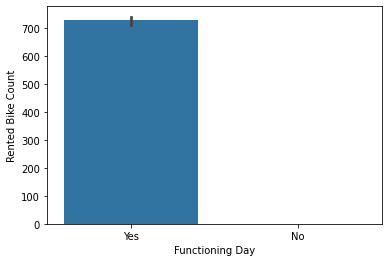

In [37]:
sns.barplot(x=df['Functioning Day'],y=df['Rented Bike Count'])
plt.show()

In [38]:
df.head(2)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-01-12                254     0             -5.2           37   
1 2017-01-12                204     1             -5.5           38   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  Month  Year   WeekDay  
0             Yes      1  2017  Thursday  
1             Yes      1  2017  Thursday

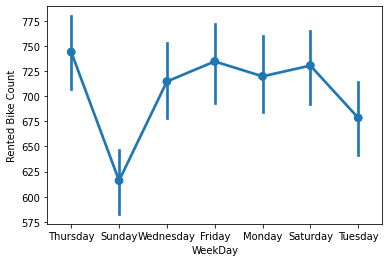

In [39]:
sns.pointplot(x=df['WeekDay'],y=df['Rented Bike Count'])

In [40]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Month', 'Year', 'WeekDay'],
      dtype='object')

**Time series**

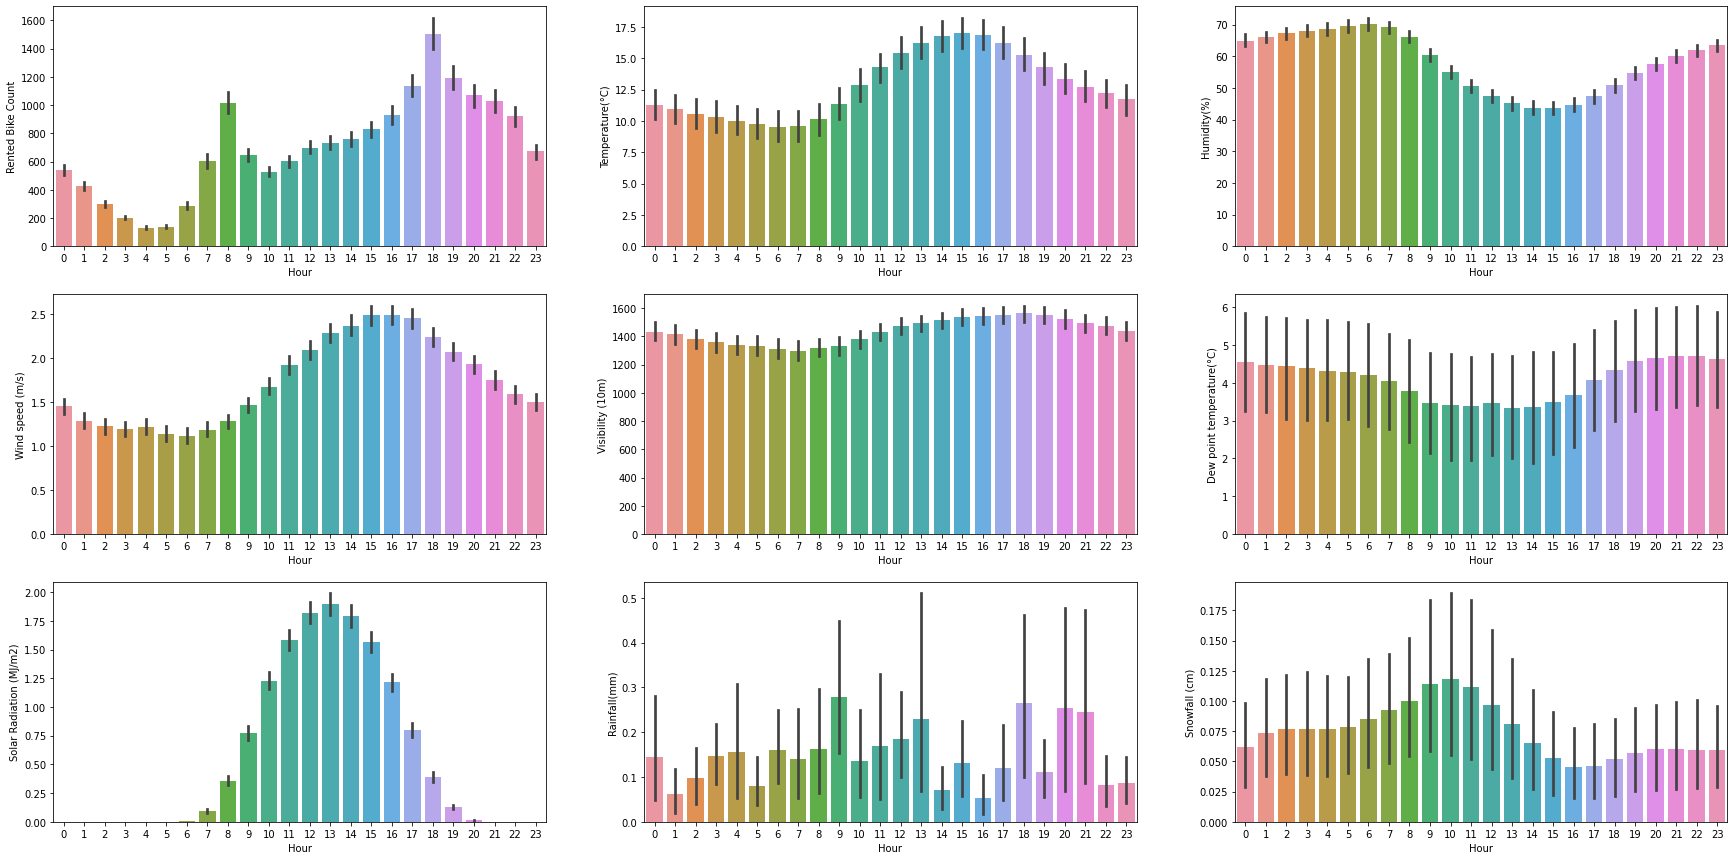

In [41]:
# features vs hours bivariate analysis
# time series
plt.figure(figsize=(30,15))
i=1
for cat in ['Rented Bike Count','Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']:
 plt.subplot(3,3,i)
 sns.barplot( x=df.Hour, y=df[cat], hue=None)
 i=i+1

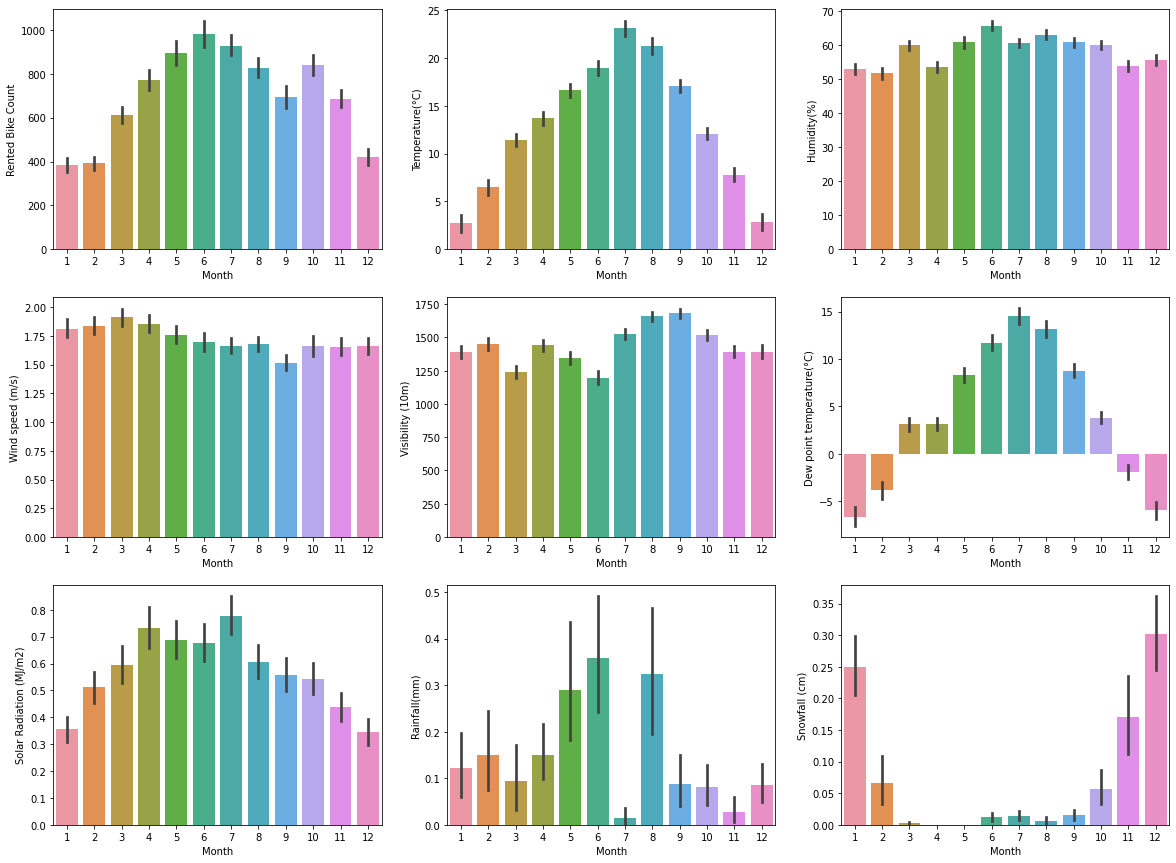

In [42]:
# features vs Month bivariate analysis
# time series
plt.figure(figsize=(20,15))
i=1
for cat in ['Rented Bike Count','Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']:
 plt.subplot(3,3,i)
 sns.barplot( x=df.Month, y=df[cat], hue=None)
 i=i+1

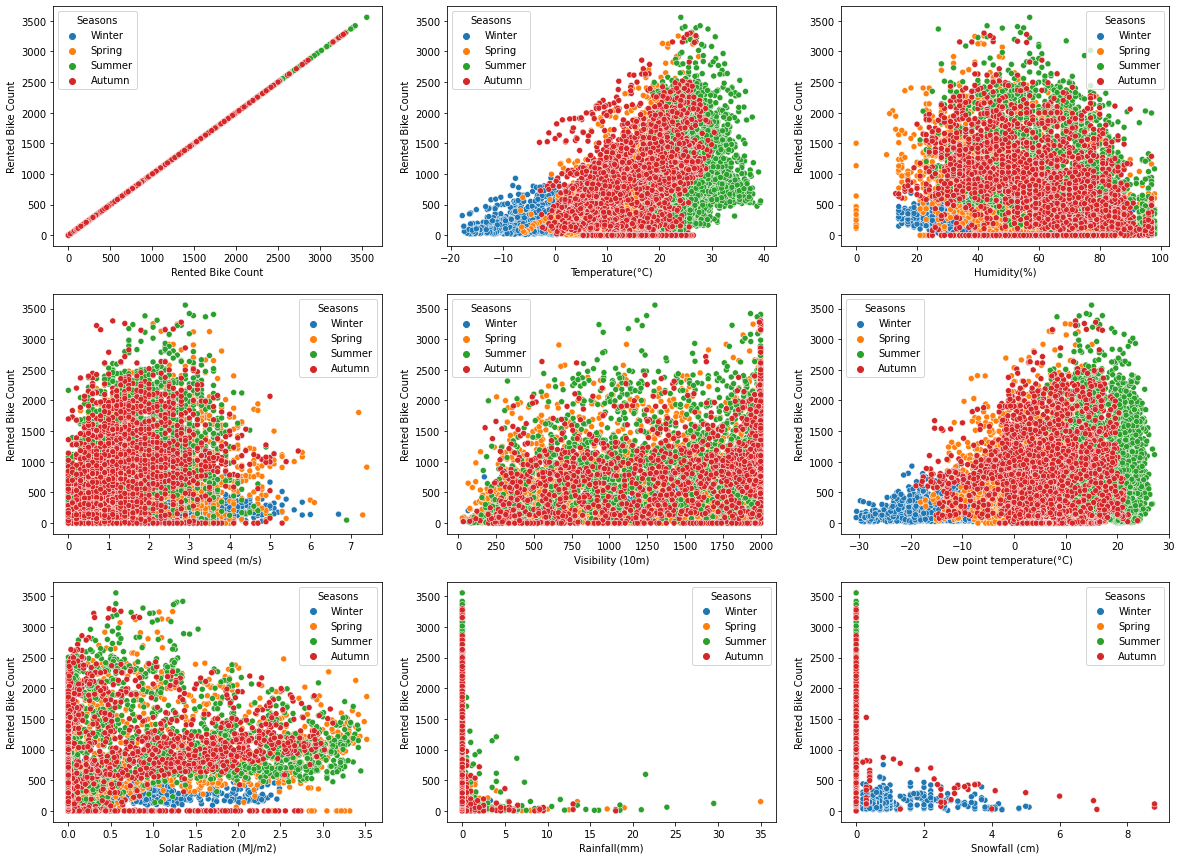

In [43]:
# features vs Month Multivariate analysis
# time series
plt.figure(figsize=(20,15))
i=1
for cat in ['Rented Bike Count','Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']:
 plt.subplot(3,3,i)
 sns.scatterplot( x=df[cat], y=df['Rented Bike Count'], hue=df.Seasons)
 i=i+1

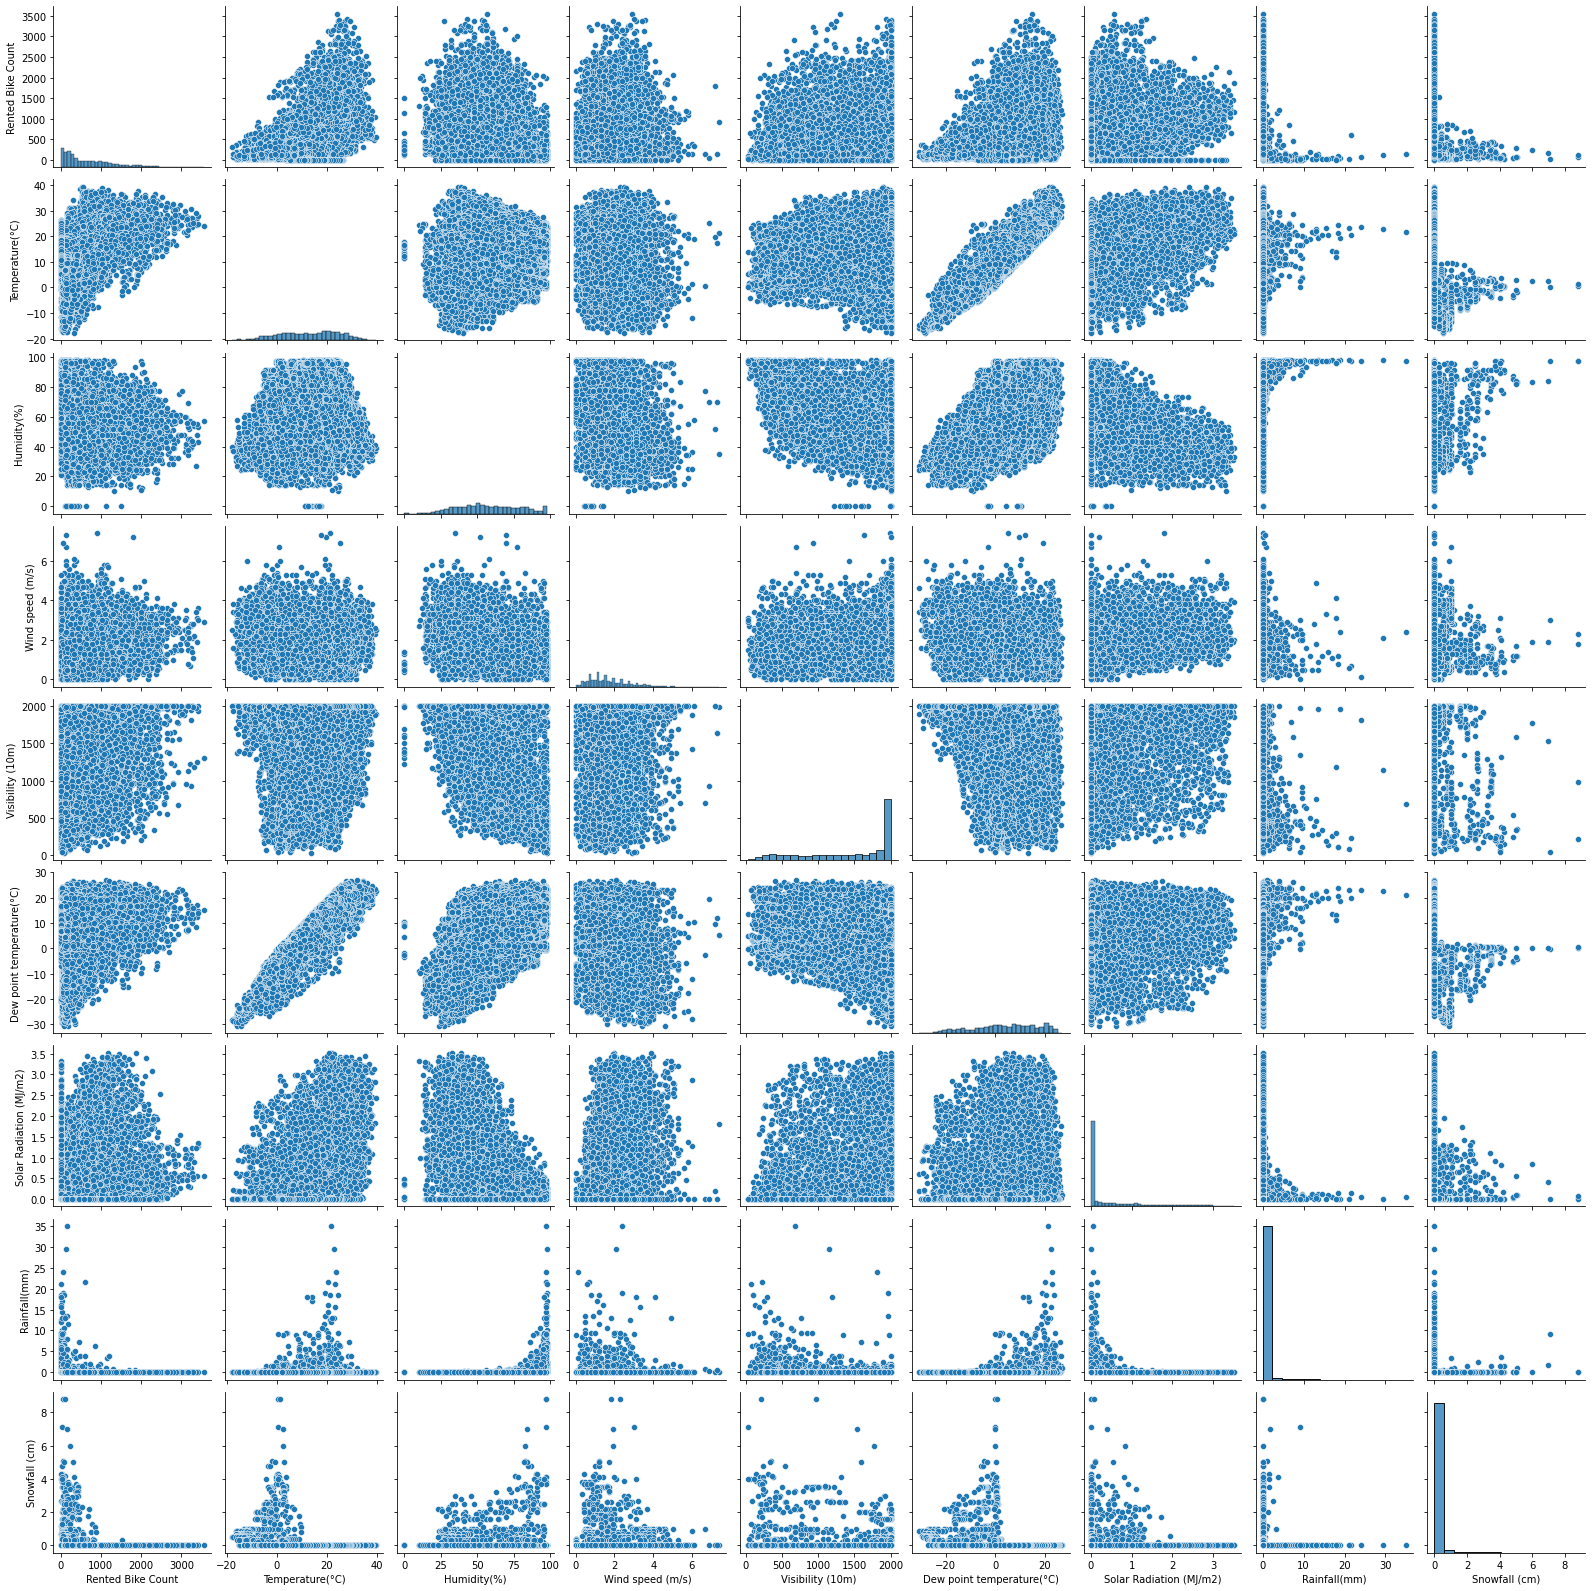

In [44]:
sns.pairplot(df[['Rented Bike Count','Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']])

**BOXPLOT for outliers**

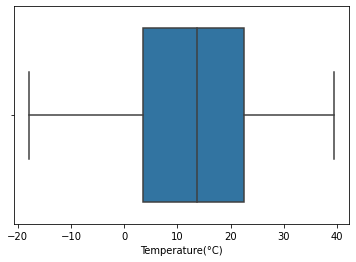

In [45]:
sns.boxplot(x=df['Temperature(°C)'])

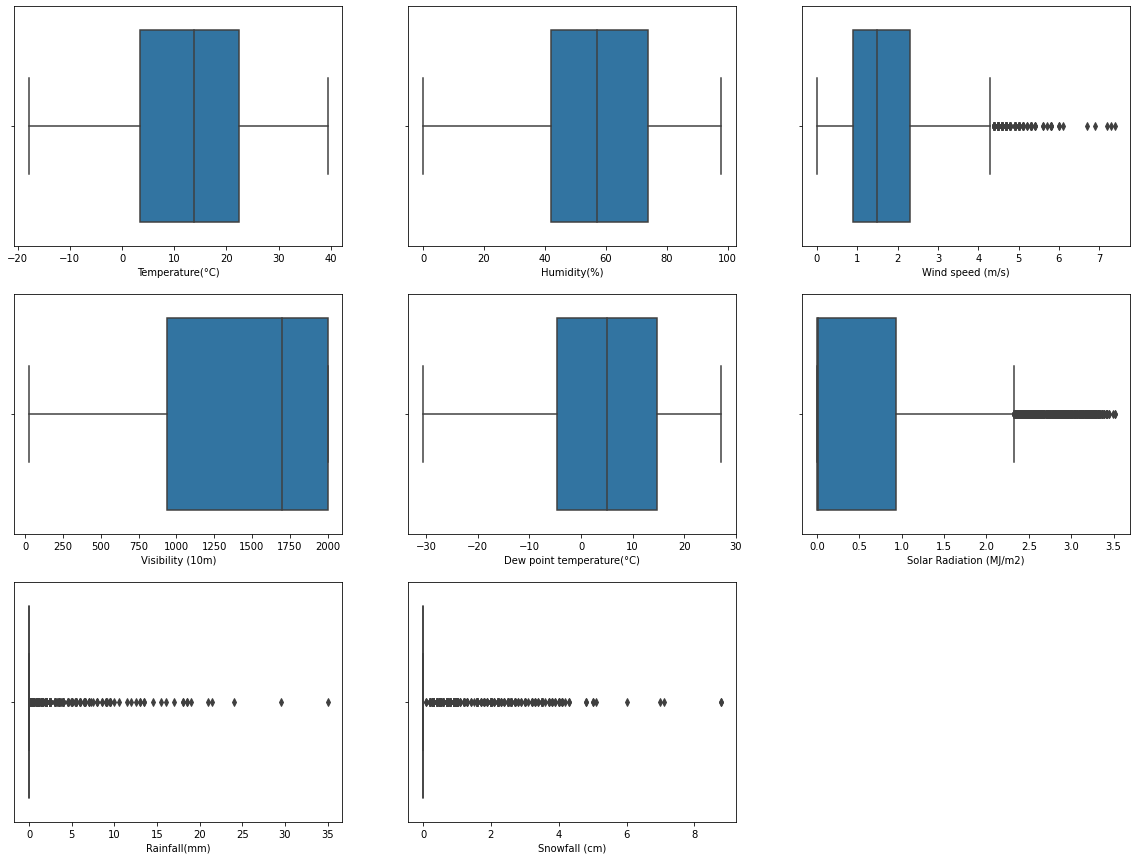

In [46]:
plt.figure(figsize=(20,15))
i=1
for cat in ['Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']:
 plt.subplot(3,3,i)
 sns.boxplot( x=df[cat])
 i=i+1

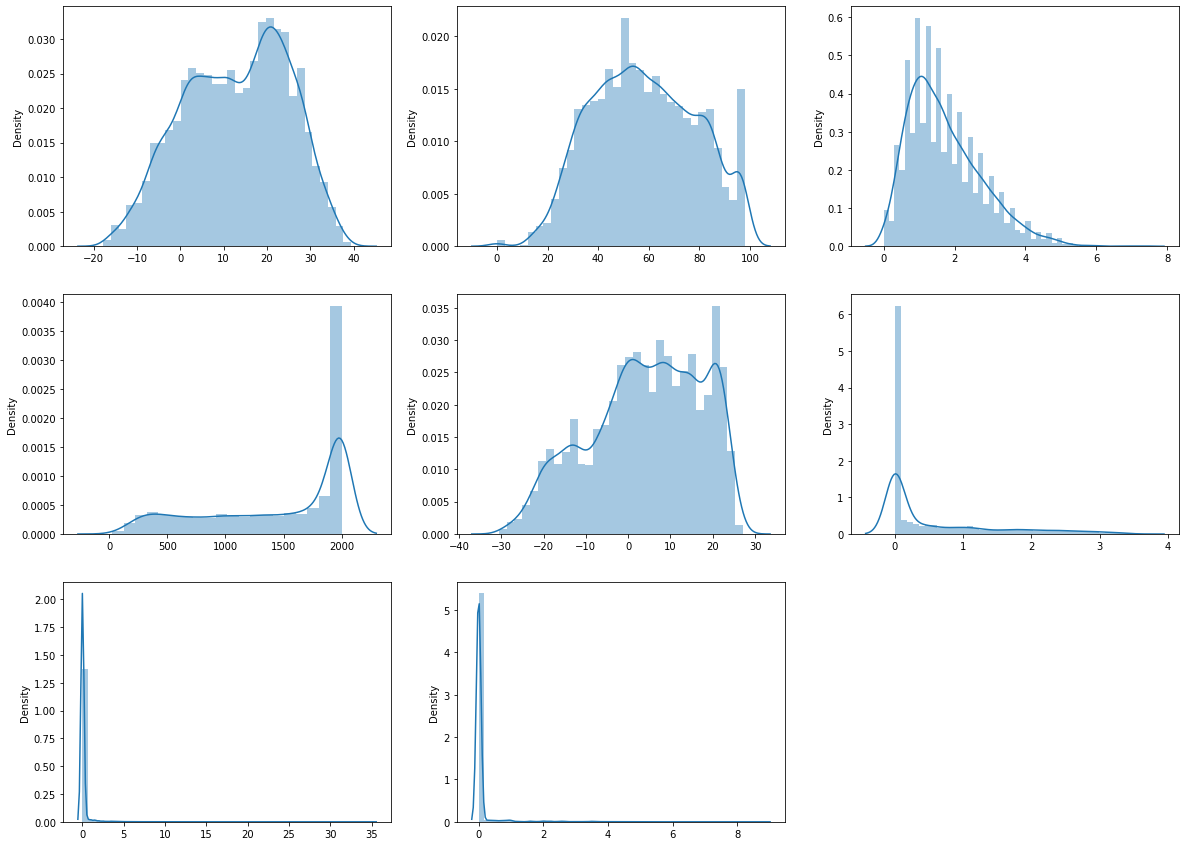

In [47]:
plt.figure(figsize=(20,15))
i=1
for cat in ['Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']:
 plt.subplot(3,3,i)
 sns.distplot( x=df[cat])
 i=i+1

## **Data preparition for ML**

In [48]:
# numerical columns
num = ['Rented Bike Count','Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
cato = ['Holiday', 'Functioning Day', 'Month', 'Year','WeekDay', 'Seasons','Hour']       

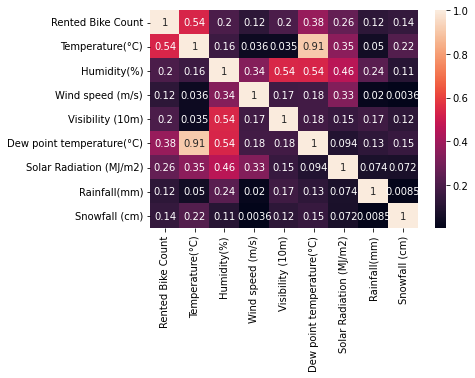

In [49]:
sns.heatmap(abs(df[num].corr()),annot = True)

In [50]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [51]:
df1 = add_constant(df)

In [52]:
df1.head(2)

const       Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0    1.0 2017-01-12                254     0             -5.2           37   
1    1.0 2017-01-12                204     1             -5.5           38   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  Month  Year   WeekDay  
0             Yes      1  2017  Thursday  
1             Yes      1  2017  Thursday

In [53]:
# VIF of dataframe x
def vif(numerical_list):
# define vif that takes argument as list of columns
  x=df1[numerical_list]
  a=pd.Series([(variance_inflation_factor(x.values,i)) for i in range(x.shape[1])], index=x.columns)
  return (a)

In [54]:
# removing dwe point
vif(['const' , 'Rented Bike Count','Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'])

const                      50.337681
Rented Bike Count           1.661014
Temperature(°C)             2.273285
Humidity(%)                 2.578001
Wind speed (m/s)            1.210906
Visibility (10m)            1.544249
Solar Radiation (MJ/m2)     1.933145
Rainfall(mm)                1.080195
Snowfall (cm)               1.088878
dtype: float64

In [55]:
# our new numerical column will be
num = [ 'Rented Bike Count','Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

In [56]:
# To create dummy columns for rest of the categorical feature we use "One Hot Encoding"
df2 = pd.get_dummies(df, columns=cato, drop_first=True)

In [57]:
df2.head(2)

Date  Rented Bike Count  Temperature(°C)  Humidity(%)  \
0 2017-01-12                254             -5.2           37   
1 2017-01-12                204             -5.5           38   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  ...  Hour_14  \
0                      0.0           0.0            0.0  ...        0   
1                      0.0           0.0            0.0  ...        0   

   Hour_15  Hour_16  Hour_17  Hour_18  Hour_19  Hour_20  Hour_21  Hour_22  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   

   Hour_23  
0        0  
1        0  

[2 rows x 56 columns]

In [58]:
df2.drop(columns= ['Date','Dew point temperature(°C)'], inplace= True)

In [59]:
df2.iloc[:,1:].columns

Index(['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)', 'Holiday_No Holiday', 'Functioning Day_Yes', 'Month_2',
       'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8',
       'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Year_2018',
       'WeekDay_Monday', 'WeekDay_Saturday', 'WeekDay_Sunday',
       'WeekDay_Thursday', 'WeekDay_Tuesday', 'WeekDay_Wednesday',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
       'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
       'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20',
       'Hour_21', 'Hour_22', 'Hour_23'],
      dtype='object')

In [60]:
# df2.iloc[:,1:].columns
independent = ['Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Holiday_No Holiday',
       'Functioning Day_Yes', 'Month_2', 'Month_3', 'Month_4', 'Month_5',
       'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11',
       'Month_12', 'Year_2018', 'WeekDay_Monday', 'WeekDay_Saturday',
       'WeekDay_Sunday', 'WeekDay_Thursday', 'WeekDay_Tuesday',
       'WeekDay_Wednesday', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5',
       'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12',
       'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18',
       'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23']
depedent = ['Rented Bike Count']       

In [61]:
# converting in normal distribution
from sklearn.preprocessing import PowerTransformer
jhon = PowerTransformer(method='yeo-johnson')

x_trasformed = jhon.fit_transform(df2)

In [62]:
# it will give result in array
x_trasformed

array([[-0.5300044 , -1.52452141, -1.0388285 , ..., -0.20851441,
        -0.20851441, -0.20851441],
       [-0.67649738, -1.55087024, -0.98648176, ..., -0.20851441,
        -0.20851441, -0.20851441],
       [-0.77942415, -1.59481869, -0.9343628 , ..., -0.20851441,
        -0.20851441, -0.20851441],
       ...,
       [ 0.3070821 , -0.85070935, -0.9343628 , ...,  4.79583152,
        -0.20851441, -0.20851441],
       [ 0.33250099, -0.89296632, -0.83078201, ..., -0.20851441,
         4.79583152, -0.20851441],
       [ 0.14159405, -0.90989244, -0.72803697, ..., -0.20851441,
        -0.20851441,  4.79583152]])

In [63]:
# convorting array into DataFrame
from pandas.core.frame import DataFrame
df3=DataFrame(x_trasformed,columns=df2.columns)
df3.head(2)

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0          -0.530004        -1.524521    -1.038829          0.618103   
1          -0.676497        -1.550870    -0.986482         -0.923651   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0          0.978214                -0.845761     -0.252859      -0.230785   
1          0.978214                -0.845761     -0.252859      -0.230785   

   Holiday_No Holiday  Functioning Day_Yes  ...   Hour_14   Hour_15   Hour_16  \
0            0.227757              0.18668  ... -0.208514 -0.208514 -0.208514   
1            0.227757              0.18668  ... -0.208514 -0.208514 -0.208514   

    Hour_17   Hour_18   Hour_19   Hour_20   Hour_21   Hour_22   Hour_23  
0 -0.208514 -0.208514 -0.208514 -0.208514 -0.208514 -0.208514 -0.208514  
1 -0.208514 -0.208514 -0.208514 -0.208514 -0.208514 -0.208514 -0.208514  

[2 rows x 54 columns]

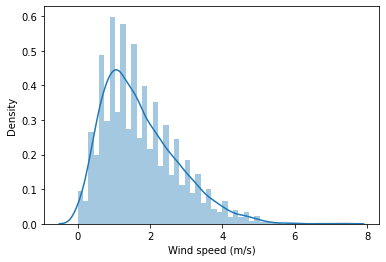

In [64]:
sns.distplot(df2['Wind speed (m/s)'])

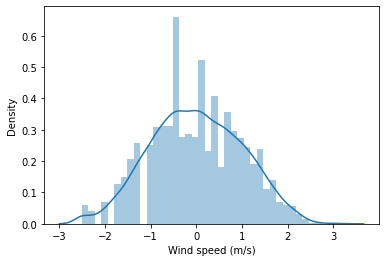

In [65]:
sns.distplot(df3['Wind speed (m/s)'])

In [66]:
# Scaling indepedend variable of df3
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_IV = scaler.fit_transform(df3[independent])

In [67]:
scaled_IV

array([[-1.52452141, -1.0388285 ,  0.61810307, ..., -0.20851441,
        -0.20851441, -0.20851441],
       [-1.55087024, -0.98648176, -0.92365142, ..., -0.20851441,
        -0.20851441, -0.20851441],
       [-1.59481869, -0.9343628 , -0.64032653, ..., -0.20851441,
        -0.20851441, -0.20851441],
       ...,
       [-0.85070935, -0.9343628 , -1.80158616, ...,  4.79583152,
        -0.20851441, -0.20851441],
       [-0.89296632, -0.83078201, -0.64032653, ..., -0.20851441,
         4.79583152, -0.20851441],
       [-0.90989244, -0.72803697, -0.26518524, ..., -0.20851441,
        -0.20851441,  4.79583152]])

In [68]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled_IV,df3['Rented Bike Count'], test_size =0.2, random_state = 0)

## **ML Models**

###**Linear Regression**

In [69]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)


In [70]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test,y_pred_test))
print(mean_squared_error(y_train,y_pred_train))
print(r2_score(y_test,y_pred_test))
print(r2_score(y_train,y_pred_train))

0.18660616648891296
0.1806139092031038
0.8177073342713707
0.8182364674973348


In [71]:
#lr.score(X_train,y_train)

In [72]:
# Adujested r2 score
Adj_r2 = 1 - (1-r2_score(y_test, y_pred_test)) * (len(df['Rented Bike Count'])-1)/(len(df['Rented Bike Count'])-53-1)
print(Adj_r2)

0.8165975810800523


In [73]:
# Crossvalidation
from sklearn.model_selection import cross_val_score
score = cross_val_score(lr,scaled_IV,df3['Rented Bike Count'],scoring='r2',cv= 50)
np.mean(score)

0.5914252987532459

In [74]:
score 

array([ 0.21300702,  0.40531817,  0.13757994,  0.45142267,  0.27301068,
        0.05234365,  0.44612254,  0.34233725,  0.111466  ,  0.16336708,
        0.33904268,  0.60662675,  0.30793394,  0.68513869,  0.64108212,
        0.77840604,  0.77655712,  0.7476453 ,  0.83551021,  0.79102804,
        0.62916123,  0.83295096,  0.71470293,  0.7514487 ,  0.69992068,
        0.4973694 ,  0.64109137,  0.65240251,  0.77468499,  0.80136811,
        0.71076917,  0.52324516,  0.51828805, -0.08150954,  0.19778899,
        0.62549039,  0.74207583,  0.67635981,  0.7803975 ,  0.87686133,
        0.83659631,  0.90991607,  0.80654686,  0.79729107,  0.7789586 ,
        0.74726299,  0.77261164,  0.86622949,  0.72936034,  0.65667809])

###**Polynomial Regression**

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

#poly_grid = GridSearchCV(PolynomialRegression(), param_grid, cv=10, scoring='neg_mean_squared_error')


In [76]:
poly = PolynomialFeatures(2) #creating variable with degree 2
poly_X_train = poly.fit_transform(X_train) # fit the train set
poly_X_test = poly.transform(X_test) #transform the test set

In [77]:
lr.fit(poly_X_train,y_train)
y_pred = lr.predict(poly_X_test)

In [78]:
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

0.08483821211242956
0.9171228682705695


###**Ridge Regression**

In [79]:
from sklearn.linear_model import Ridge

parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]} # giving parameters 
ridge = GridSearchCV(Ridge(), parameters, scoring='r2', cv=5) #using gridsearchcv and cross validate the model
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)
print(ridge.best_params_)
print(ridge.best_score_)
print(ridge.score(X_train,y_train))
print(ridge.score(X_test,y_test))

{'alpha': 10}
0.814608741068265
0.8182303907928847
0.8176497967945022


In [80]:
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

0.18666506544650366
0.8176497967945022


###**Lasso**

In [81]:
# importing Lasso from sklearn
from sklearn.linear_model import Lasso

In [82]:
# Using Grid Search CV for Hyperparameter tuning for Lasso Regression
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]} #lasso parameters 
L1 = GridSearchCV(Lasso(), parameters, cv=5) #using gridsearchcv and cross validate the model
L1.fit(X_train,y_train)
y_pred = L1.predict(X_test)

In [83]:
print(L1.best_params_)
print(L1.best_score_)
print(L1.score(X_train,y_train))
print(L1.score(X_test,y_test))

{'alpha': 0.0001}
0.8146043929919017
0.8182343828175883
0.8177084188400621


In [84]:
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

0.18660505625661158
0.8177084188400621


###**Stochastic Gradient Descent Regressor**

In [85]:
# import SGD Regressor from sklearn
from sklearn.linear_model import SGDRegressor

In [86]:
# Parameters for Grid search
params = {'penalty':['l2', 'l1', 'elasticnet'],
          'alpha' : [0.01,0.0001,0.1],
          'max_iter':[1000,800,1200],
          'learning_rate':['constant','optimal','invscaling']

          }

In [87]:
# Creating variable of gridesearch
sgd = GridSearchCV(SGDRegressor(),param_grid=params,cv=2,verbose=True)
sgd.fit(X_train,y_train)
y_pred = sgd.predict(X_test)

Fitting 2 folds for each of 81 candidates, totalling 162 fits


In [88]:
print(sgd.best_params_)
print(sgd.best_score_)
print(sgd.score(X_train,y_train))
print(sgd.score(X_test,y_test))

{'alpha': 0.0001, 'learning_rate': 'invscaling', 'max_iter': 1000, 'penalty': 'l1'}
0.8127694160345706
0.8162891877297794
0.8138415255094238


In [89]:
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

0.19056344996251165
0.8138415255094238


### **Decision Tree Regressor**

In [90]:
from sklearn.tree import DecisionTreeRegressor
df2 = pd.get_dummies(df, columns=cato, drop_first=True)
X = df2.iloc[:,2:]
y = df2['Rented Bike Count']

In [91]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.2, random_state = 0)

In [92]:
# Parameters for Decission Tree model
param_grid = {'criterion':['mse'],#'squared_error', 'absolute_error',],
              'min_samples_leaf':[5],#7,10],
              'max_depth' : [18],#10,25],
              'min_samples_split': [25],#15,35],
              'max_features':['auto'],#'sqrt','log2']
              }

# After finding the best parameters, we commented on all the other parameters for faster execution

In [93]:
# Using Grid Search 
Dt_grid = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid,cv=5,n_jobs=-1,)
Dt_grid.fit(X_train,y_train)
y_pred = Dt_grid.predict(X_test)

In [94]:
print(Dt_grid.best_params_)
print(Dt_grid.best_score_)
print(Dt_grid.score(X_train,y_train))
print(Dt_grid.score(X_test,y_test))

{'criterion': 'mse', 'max_depth': 18, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 25}
0.8130916742874396
0.8903039650263301
0.7720982140870297


In [95]:
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

95382.04535366684
0.7720982140870297


###**RandomForest Regressor**

In [96]:
# Importing Randomfroest from sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor

In [97]:
param_grid = {'n_estimators':[150],#100,200],
              'min_samples_leaf':[4],#6,2],
              'max_depth' : [20],#25,30],
              'min_samples_split': [25],#30,20],
              'max_features':['auto'],#'sqrt','log2']
              }
# After finding the best parameters, we commented on all the other parameters for faster execution

In [98]:
# Using Grid SearchCV 
Rf = GridSearchCV(RandomForestRegressor(),param_grid=param_grid,n_jobs=-1,cv=5)
Rf.fit(X_train,y_train)
y_pred = Rf.predict(X_test)

In [99]:
print(Rf.best_params_)
print(Rf.best_score_)
print(Rf.score(X_train,y_train))
print(Rf.score(X_test,y_test))

{'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 25, 'n_estimators': 150}
0.8569981022209131
0.9097001674946776
0.8509624076259077


In [100]:
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

62375.59893741035
0.8509624076259077


###**Bagging Regressor**

In [101]:
# Importing Bagging from sklearn.ensemble
from sklearn.ensemble import BaggingRegressor

In [102]:
# parameters for Bagging
param_grid = {"n_estimators":[100],#,150,200],
              "bootstrap":["True"],#,"False"],
              'max_samples' :[0.3],#,0.5,0.7,1.0],
              'max_features':[1.0],#0.3,0.5,0.7,]
              }

# After finding the best parameters, we commented on all the other parameters for faster execution

In [103]:
# Using Grid SearchCV 
Bagging_gs = GridSearchCV(BaggingRegressor(),param_grid=param_grid,n_jobs=-1,cv=5)
Bagging_gs.fit(X_train,y_train)
y_pred = Bagging_gs.predict(X_test)

In [104]:
print(Bagging_gs.best_params_)
print(Bagging_gs.best_score_)
print(Bagging_gs.score(X_train,y_train))
print(Bagging_gs.score(X_test,y_test))

{'bootstrap': 'True', 'max_features': 1.0, 'max_samples': 0.3, 'n_estimators': 100}
0.8605494414001171
0.9271114639887579
0.8590286821250365


In [105]:
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

58999.68085485159
0.8590286821250365


###**Gradient Boosting**

In [106]:
# Importing Gradient Boosting Regressor from sklearn.ensemble
from sklearn.ensemble import GradientBoostingRegressor 

In [107]:
# parameters for Gradient Boosting Regressor
param_grid={'loss':['huber'],#'squared_error', 'absolute_error','quantile'],
            'min_impurity_decrease':[0.4],#0.2,0.6],
            'criterion':['mse'],#'mae'],
            'n_estimators':[800],#600,400,1000], 
            'learning_rate': [0.01],#0.03,0.1,0.05], 
            'min_samples_leaf':[6],#4,8]
            'max_depth':[25],#15,20,30],
            'subsample':[0.7],#0.5,1.0],
            'max_leaf_nodes':[17],#15,10,20],
            'max_features':['auto']#'sqrt', 'log2'] 
            }
            
# After finding the best parameters, we commented on all the other parameters for faster execution

In [108]:
# Using grid search 
GB = GridSearchCV(GradientBoostingRegressor(), param_grid=param_grid, n_jobs=-1,cv=5,verbose=2)
GB.fit(X_train,y_train)
y_pred = GB.predict(X_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [109]:
print(GB.best_params_)
print(GB.best_score_)
print(GB.score(X_train,y_train))
print(GB.score(X_test,y_test))

{'criterion': 'mse', 'learning_rate': 0.01, 'loss': 'huber', 'max_depth': 25, 'max_features': 'auto', 'max_leaf_nodes': 17, 'min_impurity_decrease': 0.4, 'min_samples_leaf': 6, 'n_estimators': 800, 'subsample': 0.7}
0.8862395199605236
0.9101304142332483
0.885916658038013


In [110]:
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

47746.45557745425
0.885916658038013


###**Extreme Gradient Boosting**

In [111]:
from xgboost import XGBRegressor

In [112]:
params = {
          'subsample': [0.5],#0.3,0.7], 
          'n_thread': [4], #2,6],
          'n_estimators': [1000],#range(200,1500,50), 
          'min_child_weight': [2],#3,5], 
          'max_depth': [4],#range(2,8,2), 
          'learning_rate': [0.02],#0.04,0.06], 
          'eval_mertric': ['rmse'],#'mse',], 
          'colsample_bytree': [0.7],#0.5,1.0],  
          }

# After finding the best parameters, we commented on all the other parameters for faster execution

In [113]:
#creating xgb grid model
xgb= GridSearchCV(XGBRegressor(silent=True),param_grid=params,cv=5)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)

In [114]:
print(xgb.best_params_)
print(xgb.best_score_)
print(xgb.score(X_train,y_train))
print(xgb.score(X_test,y_test))

{'colsample_bytree': 0.7, 'eval_mertric': 'rmse', 'learning_rate': 0.02, 'max_depth': 4, 'min_child_weight': 2, 'n_estimators': 1000, 'n_thread': 4, 'subsample': 0.5}
0.8772969454474113
0.9164373709600157
0.8738254151465522


In [115]:
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

52806.913850018784
0.8738254151465522


##<b> Stacking Regressor

In [116]:
# import stacking regressor from sklearn ensemble
from sklearn.ensemble import StackingRegressor

In [117]:
# Base Estimators 
estimators = [('dt',Dt_grid.best_estimator_),('rf',Rf.best_estimator_),
       ('bg',Bagging_gs.best_estimator_),('xgb',xgb.best_estimator_),
       ]

In [118]:
# creating a variable for StackingRegressor
stacking= StackingRegressor(estimators=estimators,final_estimator=XGBRegressor(),passthrough=True,n_jobs=-1)
stacking.fit(X_train,y_train)
y_pred = stacking.predict(X_test)

[09:17:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [119]:
print(stacking.score(X_train,y_train))
print(stacking.score(X_test,y_test))

0.9366854012609818
0.8933175593492767


In [120]:
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

44649.01120376895
0.8933175593492767


#<b>Conclusion:

We obsereved that bike rental count is high during week days then weekend days.

The rental bike counts is at its peek at 8 AM in the morning and 6pm in the evening,
We can see an increasing trend from 5am to 8 am, the graph touches the peak at 8am and then there is dip in the graph.
Later we can see a gradual increase in the demand until 6pm, the demand is highest at 6 pm, and reduces there after until midnight,

We observed that people prefer to rent bikes at moderate to high tempreture, and even when it is little windy,

it is observed that highest bike rental count is in Autumn and summer seasons and the lowest is in winter season.

We observed that the bike rentals is highest during the clear days and lowest on snowy and rainy days.

Stacking Regressor gives the highest Score where R2 score is  0.89 and Training score is 0.93 so this model is the best for predicting the bike rental count on daily basis.





